In [1]:
import numpy as np
from neural_network import Layer
from neural_network import LoadData
import pandas as pd
import matplotlib.pyplot as plt
import copy

In [2]:
DataLoader = LoadData.LoadData()
X_train, X_test, y_train, y_test = DataLoader.partition_dataset()

In [3]:
learning_rate = 0.1
layer_1 = Layer.Layer(4,8,learning_rate)
layer_2 = Layer.Layer(8,5,learning_rate)
layer_3 = Layer.Layer(5,3,learning_rate)

In [4]:
layer_1.initialize()
layer_2.initialize()
layer_3.initialize()

In [5]:
X_test.shape

(4, 1, 50)

In [6]:
epochs = 10000
batch_size = 5
training_error = np.zeros(shape=(epochs, batch_size)) # Container of the training error
testing_error = np.zeros(shape=(epochs, X_test.shape[2])) #Container for the testing error
for k in range(epochs):
    # Select withing the training set the samples that will be given for the batch
    indexes = np.random.randint(0, high=99, size=(batch_size,))
    X_train_ = X_train[:,:,indexes].copy()
    y_train_ = y_train[:,:,indexes].copy()
    for i in range(X_train_.shape[2]):
        X_in = X_train_[:,:,i]
        #Beginning of forward propagation
        layer_1.receive_input_vector(X_in)
        layer_1.calculate_output_vector()
        
        layer_2.receive_input_vector(layer_1.output_vector)
        layer_2.calculate_output_vector()
        
        layer_3.receive_input_vector(layer_2.output_vector)
        layer_3.calculate_output_vector()
        
        y_in = y_train_[:,:,i]
        
        #Error vector (final step of forward propagation)
        error = layer_3.output_vector - y_in
        
        
        #Beginning of the backpropagation algorithm
        training_error[k][i] = np.dot(error.T, error)
        
        layer_3.update_weights(error)
        back_3 = layer_3.return_derivative_vector(error)
        
        layer_2.update_weights(back_3)
        back_2 = layer_2.return_derivative_vector(back_3)
        
        layer_1.update_weights(back_2)
    
    # At this point, for this epoch (where we give 5 samples to the network to update the weights and bias)
    # the weights and biases are updated. In order to not mess with the weights, we will copy each layer
    layer_1_aux = copy.deepcopy(layer_1)
    layer_2_aux = copy.deepcopy(layer_2)
    layer_3_aux = copy.deepcopy(layer_3)
    # Now that we have copied the network at the present moment, we can have the errors made at the testing dataset
    for i in range(X_test.shape[2]):
        X_test_1=X_test[:,:,i]
        y_test_1=y_test[:,:,i]
        layer_1_aux.receive_input_vector(X_test_1)
        layer_1_aux.calculate_output_vector()
        
        layer_2_aux.receive_input_vector(layer_1.output_vector)
        layer_2_aux.calculate_output_vector()
        
        layer_3_aux.receive_input_vector(layer_2.output_vector)
        layer_3_aux.calculate_output_vector()
        y_pred = layer_3_aux.output_vector
    
        diff = y_test_1 - y_pred
        testing_error[k, i] = np.dot(diff.T, diff)

In [7]:
training_error.shape

(10000, 5)

In [8]:
testing_error.shape

(10000, 50)

In [9]:
mean_training_error = np.mean(training_error, axis=1)
mean_testing_error = np.mean(testing_error, axis=1)

In [22]:
mean_training_error.shape

(10000,)

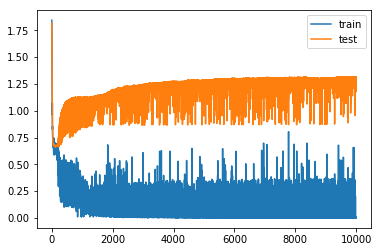

In [35]:
x_tr = np.array(range(mean_training_error.shape[0]))
x_ts = np.array(range(mean_testing_error.shape[0]))

lines = plt.plot(x_tr, mean_training_error, x_ts, mean_testing_error)

plt.legend(('train', 'test'),loc='upper right')

We can see on the previous figure that the error for the test set diminishes (on average) and that the error on
the training set decreases, then increases and stabilizes.

We can now check how many testing samples were correctly classified

In [36]:
sum_train = 0
for i in range(X_train.shape[2]):
    X_train_1=X_train[:,:,i]
    y_train_1=y_train[:,:,i]
    layer_1.receive_input_vector(X_train_1)
    layer_1.calculate_output_vector()
        
    layer_2.receive_input_vector(layer_1.output_vector)
    layer_2.calculate_output_vector()
    layer_3.receive_input_vector(layer_2.output_vector)
    layer_3.calculate_output_vector()
    y_pred = np.rint(layer_3.output_vector)
    
    diff_ = y_pred - y_train_1
    sum_train = sum_train + diff_.sum()

In [37]:
sum_test = 0
for i in range(X_test.shape[2]):
    X_test_1=X_test[:,:,i]
    y_test_1=y_test[:,:,i]
    layer_1.receive_input_vector(X_test_1)
    layer_1.calculate_output_vector()
        
    layer_2.receive_input_vector(layer_1.output_vector)
    layer_2.calculate_output_vector()
    layer_3.receive_input_vector(layer_2.output_vector)
    layer_3.calculate_output_vector()
    y_pred = np.rint(layer_3.output_vector)
    
    diff_ = np.abs(y_pred - y_test_1)
    sum_test = sum_test + diff_.sum()

In [38]:
print(sum_train/X_train.shape[2])
print(sum_test/X_test.shape[2])

0.0
0.08
